<a href="https://colab.research.google.com/github/Takaros96/Hierarchical-relational-data-analysis-using-python/blob/main/Coursera_guided_project_Hierarchical_relational_data_analysis_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo

In [ ]:
data=pd.read_csv('dataset.csv')

In [ ]:
data.head()

,Date,Store_City,Store_Location,Store_Name,Product_Category,Product_Cost,Product_Price,Product_Name,Items_Sold,Profit
0,2017-01-01,Aguascalientes,Downtown,Maven Toys Aguascalientes 1,Games,9.99,12.99,Chutes & Ladders,1,3.0
1,2017-01-01,Aguascalientes,Downtown,Maven Toys Aguascalientes 1,Games,9.99,12.99,Chutes & Ladders,1,3.0
2,2017-01-01,Aguascalientes,Downtown,Maven Toys Aguascalientes 1,Games,9.99,12.99,Chutes & Ladders,1,3.0
3,2017-01-01,Aguascalientes,Downtown,Maven Toys Aguascalientes 1,Games,9.99,12.99,Chutes & Ladders,1,3.0
4,2017-01-01,Aguascalientes,Downtown,Maven Toys Aguascalientes 1,Games,9.99,12.99,Chutes & Ladders,1,3.0


In [ ]:
data.Product_Cost=data.Product_Cost.str.replace('$','',regex=False).astype(float)#i am not using regex to find patterns in the string

In [ ]:
data.Product_Price=data.Product_Price.str.replace('$','',regex=False).astype(float)

In [ ]:
data.Date=pd.to_datetime(data['Date'])

In [ ]:
data.Store_Location.unique()

array(['Downtown', 'Commercial', 'Residential', 'Airport'], dtype=object)

<Axes: >

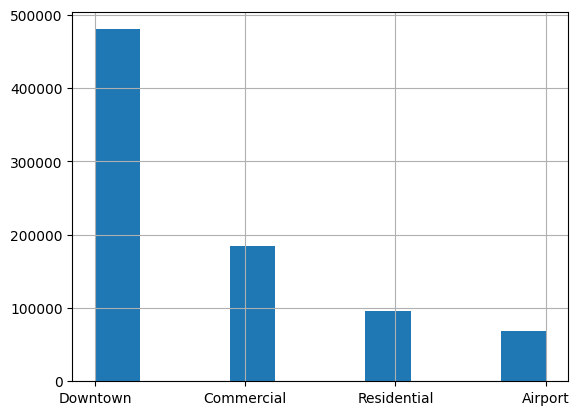

In [ ]:
data.Store_Location.hist()

<Axes: >

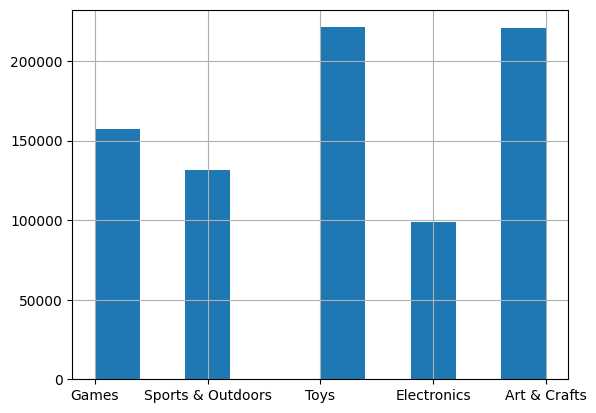

In [ ]:
data.Product_Category.hist()

<Axes: >

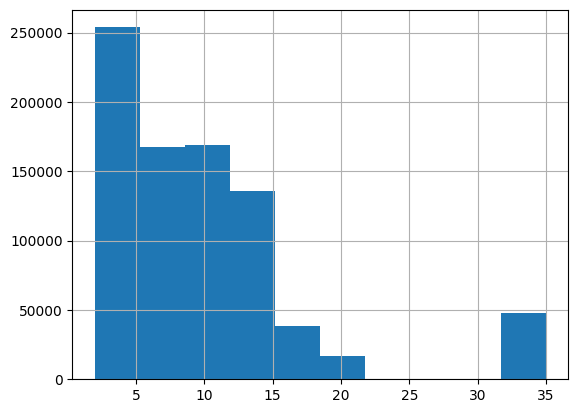

In [ ]:
data.Product_Cost.hist()

In [ ]:
data['Profit']=(data['Product_Price']-data['Product_Cost'])*data['Items_Sold']

In [ ]:
data['Profit']

0          3.0
1          3.0
2          3.0
3          3.0
4          3.0
          ... 
829257    14.0
829258    21.0
829259    14.0
829260    14.0
829261    14.0
Name: Profit, Length: 829262, dtype: float64

In [ ]:
data_santiago=data[data['Store_City']=='Santiago']

In [ ]:
data_santiago=data_santiago[['Date','Profit']]

In [ ]:
data_santiago

,Date,Profit
10371,2017-01-28,1.0
10372,2017-01-28,1.0
10373,2017-01-28,1.0
10374,2017-01-28,1.0
10375,2017-01-28,1.0
...,...,...
827040,2018-09-29,7.0
827041,2018-09-29,7.0
827042,2018-09-29,7.0
827043,2018-09-29,7.0


In [ ]:
data_santiago=data_santiago.sort_values('Date')

In [ ]:
data_santiago

,Date,Profit
257208,2017-01-01,6.0
722768,2017-01-01,12.0
722769,2017-01-01,12.0
722770,2017-01-01,12.0
722771,2017-01-01,18.0
...,...,...
302800,2018-09-30,3.0
302799,2018-09-30,3.0
302798,2018-09-30,3.0
302796,2018-09-30,3.0


In [ ]:
data_santiago.daily=data_santiago.groupby('Date').sum().reset_index()#in order not to have multi index DataFrame

<ipython-input-34-b3e51462422e>:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
px.line(data_santiago.daily,x='Date',y='Profit')

In [ ]:
#data granularity is the level of information we can see in our data.am i aggregating in year,months or days basis?

In [ ]:
data_santiago['Year']=pd.DatetimeIndex(data_santiago.Date).year#Datetime lets you extract year month or date from a datetime
data_santiago['Month']=pd.DatetimeIndex(data_santiago.Date).month

In [ ]:
data_santiago

,Date,Profit,Year,MOnth,Month
257208,2017-01-01,6.0,2017,1,1
722768,2017-01-01,12.0,2017,1,1
722769,2017-01-01,12.0,2017,1,1
722770,2017-01-01,12.0,2017,1,1
722771,2017-01-01,18.0,2017,1,1
...,...,...,...,...,...
302800,2018-09-30,3.0,2018,9,9
302799,2018-09-30,3.0,2018,9,9
302798,2018-09-30,3.0,2018,9,9
302796,2018-09-30,3.0,2018,9,9


In [ ]:
data_santiago_monthly=data_santiago.groupby(['Year','Month']).sum().reset_index()
data_santiago_monthly['Year-Month']=data_santiago_monthly.Year.astype(str)+'-'+data_santiago_monthly.Month.astype(str)

<ipython-input-45-c2408df1dc5a>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
data_santiago_monthly

,Year,Month,Profit,MOnth,Year-Month
0,2017,1,3185.0,492,2017-1
1,2017,2,2285.0,1002,2017-2
2,2017,3,3212.0,1953,2017-3
3,2017,4,4214.0,3216,2017-4
4,2017,5,3421.0,3420,2017-5
5,2017,6,3982.0,4110,2017-6
6,2017,7,2793.0,4172,2017-7
7,2017,8,2703.0,4568,2017-8
8,2017,9,3402.0,6525,2017-9
9,2017,10,2215.0,5370,2017-10


In [ ]:
px.bar(data_santiago_monthly,x='Year-Month',y='Profit',title='Santiago monthly profit')

In [ ]:
#granularity is important when working with hierarchical data

In [ ]:
Q1=data[['Product_Name','Profit']].groupby('Product_Name').sum().reset_index()

In [ ]:
px.bar(Q1,x='Product_Name',y='Profit')

In [ ]:
Q2=data[['Product_Category','Profit']].groupby('Product_Category').sum().reset_index()

In [ ]:
px.bar(Q2,x='Product_Category',y='Profit')

In [ ]:
Q3=data[['Product_Category','Product_Name','Profit']].groupby(['Product_Category','Product_Name']).sum().reset_index()

In [ ]:
px.bar(Q3,x='Product_Name',y='Profit',color='Product_Category')

In [ ]:
px.bar(Q3,x='Product_Category',y='Profit',color='Product_Name')

In [ ]:
Q5=data[['Store_Location','Product_Category','Profit']].groupby(['Store_Location','Product_Category']).sum().reset_index()

In [ ]:
Q5.head()

,Store_Location,Product_Category,Profit
0,Airport,Art & Crafts,61441.0
1,Airport,Electronics,108197.0
2,Airport,Games,80768.0
3,Airport,Sports & Outdoors,39393.0
4,Airport,Toys,88250.0


In [ ]:
px.bar(Q5,x='Store_Location',y='Profit',color='Product_Category')

In [ ]:
px.sunburst(Q5,path=['Store_Location','Product_Category'],values='Profit')#sunburst is a
#perfect technique when working with hierarchical data
#The path represents the order of he hierarchy

In [ ]:
px.treemap(Q5,path=['Store_Location','Product_Category'],values='Profit')#Rectangulars divided in smaller rectangulars inside
#different granularity levels in one diagram

In [ ]:
path=['Store_City','Store_Location','Store_Name','Product_Category','Product_Name']
px.treemap(data,path=path,values='Profit')#Great summarization